# MODEL SELECTION

In [115]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
plt.rcParams['figure.figsize']=(16, 8.27) #set graphs size to A4 dimensions
sns.set_style('darkgrid')
sns.set(font_scale = 1.4)

In [116]:
train=pd.read_csv('final_train.csv')

In [117]:
X=train.drop('wage_class',axis=1)
y=train['wage_class']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## MODELS CROSS VALIDATION

### XGBoost

In [119]:
xgb_classifier=xgb.XGBClassifier()
score_xgb=cross_val_score(xgb_classifier, X, y, cv=5, n_jobs=-1, scoring='f1_macro')

### Random Forest

In [120]:
rf=RandomForestClassifier()
score_rf=cross_val_score(rf, X, y, cv=5, n_jobs=-1)

### SVC

In [121]:
svc=SVC()
score_svc=cross_val_score(svc, X, y, cv=5, n_jobs=-1)

### Logistic Regression

In [122]:
logReg=LogisticRegression()
score_logReg=cross_val_score(logReg, X, y, cv=5, n_jobs=-1)

### KNN

In [123]:
knn=KNeighborsClassifier()
score_knn=cross_val_score(knn, X, y, cv=5, n_jobs=-1)

### AdaBoost

In [124]:
adaboost=AdaBoostClassifier()
score_adaboost=cross_val_score(adaboost, X, y, cv=5, n_jobs=-1)

In [125]:
scores=pd.DataFrame({'Model':['XGBoost','Random Forest','SVC','Logistic Regression','KNN','Adaboost'],
                    'Accuracy':[score_xgb.mean(),score_rf.mean(),score_svc.mean(),score_logReg.mean(),score_knn.mean(),
                             score_adaboost.mean()]})

In [126]:
print(scores)

                 Model  Accuracy
0              XGBoost  0.896810
1        Random Forest  0.885464
2                  SVC  0.838324
3  Logistic Regression  0.818318
4                  KNN  0.855201
5             Adaboost  0.850337


# FINAL MODEL EVALUATION

At this point we are going to evaluate the model in the initial test set

In [127]:
test=pd.read_csv('final_test.csv')

In [128]:
X_train=train.drop('wage_class',axis=1)
y_train=train['wage_class']

X_test=test.drop('wage_class',axis=1)
y_test=test['wage_class']

In [129]:
xgb_classifier.fit(X_train,y_train)
y_pred=xgb_classifier.predict(X_test)

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     12435
           1       0.69      0.75      0.72      3846

    accuracy                           0.86     16281
   macro avg       0.80      0.82      0.81     16281
weighted avg       0.86      0.86      0.86     16281



In [131]:
xgboost_auc=roc_auc_score(y_test,y_pred)
r_probs = [0 for _ in range(len(y_test))]
random_auc = roc_auc_score(y_test, r_probs)

In [132]:
probs=xgb_classifier.predict_proba(X_test)

In [133]:
probs=probs[:,1] #keep probabilities for one class

In [134]:
r_fpr, r_tpr, _=roc_curve(y_test,probs)
x=np.arange(0,1.01,0.01)

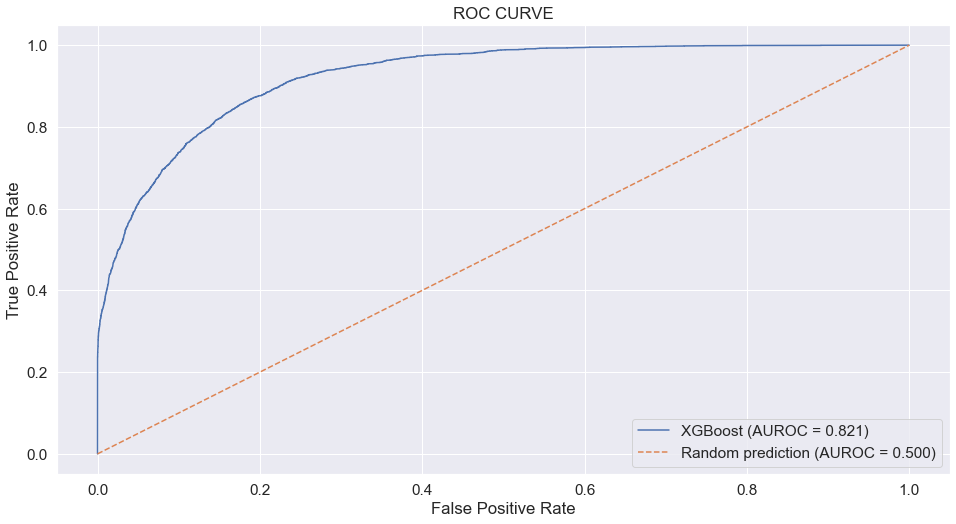

In [136]:
plt.plot(r_fpr, r_tpr, label='XGBoost (AUROC = %0.3f)' % xgboost_auc)
plt.plot(x,x, linestyle='--', label='Random prediction (AUROC = %0.3f)' % random_auc)
plt.legend()
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()